<a href="https://colab.research.google.com/github/khipucode/phd_data_and_codes/blob/main/4_3_2_df_heatmaps_MZM_analise_N_7_9_comp_experimetal_FIG_4_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

tamanho de amostras do df 10815


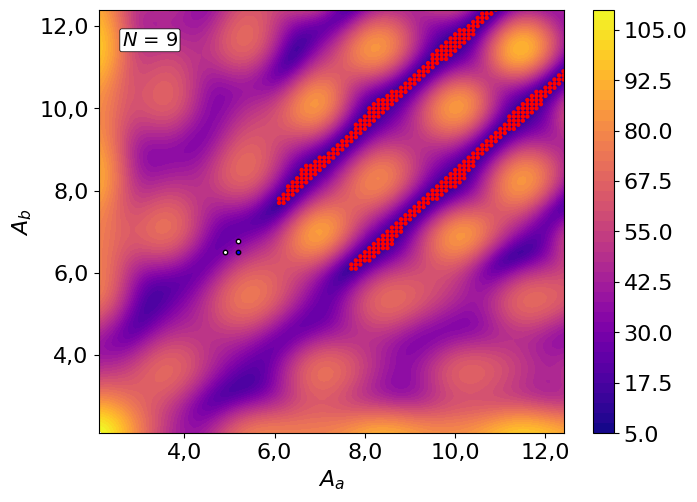

Pb9a = 7.7 
Pb9b  = 6.1
Pb9a*= 6.1 
Pb9b*= 7.7


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import MaxNLocator, AutoLocator, ScalarFormatter
from matplotlib.ticker import FuncFormatter
# Função para formatar os rótulos dos eixos com vírgula como separador decimal
def format_comma(x, pos):
    return f'{x:.1f}'.replace('.', ',')

# dados gerado para Apm = 1.9, Aa, Ab  = 5.5 a 17 quando N = 15 linhs foram comparadas
url_n15 = 'https://raw.githubusercontent.com/khipucode/phd_data_and_codes/main/dados/Data_4_3_2_values_MZM_N_9_Ax_2.1_12.5.csv'
#url_n15 = 'https://raw.githubusercontent.com/khipucode/phd_data_and_codes/main/dados/Data_4_3_2_values_MZM_N_5_Ax_2.1_12.5.csv'

# Valores específicos
Apm_value = 0
CV = 14.5  # CV superior
N_used = 9

color_cmap = 'plasma'  #'GnBu' # 'viridis' #'OrRd'  # cor do mapa verdecito 'viridis'
point_color = 'red'  # cor dos pontos 'blue'



dfN15 = pd.read_csv(url_n15)
print('tamanho de amostras do df', len(dfN15))


# Configurações de estilo
tk_sz = 16  # Tamanho dos ticks nos eixos
ax_lb_sz = 16  # Tamanho das labels dos eixos
ann_tx_sz = 14  # Tamanho do texto da anotação
an_bg_cl = 'white'  # Cor de fundo da anotação
h_let = 16


# Dando nomenas colunas
dfN15.shape

#              nv,  iApm, iAa, iAb, CV,  AV, flat, CVmin, a1,a2,a3
dfN15.columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
subset = dfN15[dfN15['B'] == Apm_value]  # Cria um subset com o Apm

# Cria uma grade regular de pontos
c_unique = np.linspace(subset['C'].min(), subset['C'].max(), len(subset['C'].unique()))
d_unique = np.linspace(subset['D'].min(), subset['D'].max(), len(subset['D'].unique()))
c_grid, d_grid = np.meshgrid(c_unique, d_unique)

# Interpola os valores de 'E' para a grade criada
e_grid = griddata((subset['C'], subset['D']), subset['E'], (c_grid, d_grid), method='cubic')

# Cria o gráfico de contorno
plt.rcParams.update({'font.size': h_let})
plt.figure(figsize=(7.5, 5.5))
contour = plt.contourf(c_grid, d_grid, e_grid, levels=50, cmap= color_cmap) # cmap='viridis')
plt.colorbar(contour)

# Definir o formatter para os eixos x e y
formatter = FuncFormatter(format_comma)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)
#plt.title(f'Mapa de Calor para Apm = {Apm_value}')
plt.xlabel('$A_a$')
plt.ylabel('$A_b$')

# Filtrar pontos onde 'E' é menor que CV e plotá-los
low_e_points = subset[subset['E'] < CV]
#plt.scatter(low_e_points['C'], low_e_points['D'], color='red', label=f'E < {CV}')
#plt.scatter(low_e_points['C'], low_e_points['D'], color='red', s=20, edgecolors='black', label=f'E < {CV}')  # 's' é o tamanho do marcador
plt.scatter(low_e_points['C'], low_e_points['D'], color = point_color, s=10, edgecolors='none', label=f'E <= {CV}')  # Sem bordas nos marcadores

plt.annotate(f'$N$ = {N_used}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=ann_tx_sz,
              backgroundcolor=an_bg_cl, ha='left', va='top',
              bbox=dict(boxstyle="round,pad=0.1", edgecolor='black', linewidth=0.5, facecolor='white'))

# Acessar o objeto de eixos atual
ax = plt.gca()
# Configurar o número de ticks
ax.xaxis.set_major_locator(MaxNLocator(6))  # Definir 5 ticks no eixo X
ax.yaxis.set_major_locator(MaxNLocator(6))  # Definir 6 ticks no eixo Y


Aa1 = 5.2; Ab1 = 6.5
Aa2 = 5.2; Ab2 = 6.77
Aa3 = 4.9; Ab3 = 6.5
#Aa4 = 9.07; Ab4 = 7.5
# Marcar o ponto (4,5)
plt.scatter(Aa1, Ab1, color='blue', s=10, edgecolors='black', zorder=5)  # 's' é o tamanho do marcador
plt.scatter(Aa2, Ab2, color='white', s=10, edgecolors='black', zorder=5)  # 's' é o tamanho do marcador
plt.scatter(Aa3, Ab3, color='white', s=10, edgecolors='black', zorder=5)  # 's' é o tamanho do marcador
#plt.scatter(Aa4, Ab4, color='white', s=25, edgecolors='black', zorder=5)  # 's' é o tamanho do marcador
# Adicionando legenda
#plt.legend()
plt.show()

# DataFrame para encontrar as minimas potencias PbN
df = low_e_points
# Calculando o índice do ponto em 'D' mais próximo de 0
idx1 = (df['D'] - 0).abs().idxmin()
idx2 = (df['C'] - 0).abs().idxmin()
# Extraindo os valores de 'C' e 'D' para esse índice
PbN_a = df.loc[idx1, 'C']
PbN_b = df.loc[idx1, 'D']

PbN_a_ = df.loc[idx2, 'C']
PbN_b_ = df.loc[idx2, 'D']

print(f"Pb{N_used}a = {PbN_a} \nPb{N_used}b  = {PbN_b}")
print(f"Pb{N_used}a*= {PbN_a_} \nPb{N_used}b*= {PbN_b_}")


In [ ]:
# Valores específicos para B e C que você deseja usar para encontrar o valor correspondente em D
Aa = 3.2  # Substitua por seu valor específico
Ab = 4.8   # Substitua por seu valor específico
# Filtrar o DataFrame para as linhas onde B e C têm os valores especificados
CVfx = dfN15[(dfN15['C'] == Aa) & (dfN15['D'] == Ab)]['E'].iloc[0]
print("CV fix:", round(CVfx,2))

AVfx = dfN15[(dfN15['C'] == Aa) & (dfN15['D'] == Ab)]['F'].iloc[0]
print("AV fix:", round(AVfx,2))


CV fix: 24.14
AV fix: 2.41


Numero de dados low_e_points 358
AV max = 2.02
AV min = 0.55


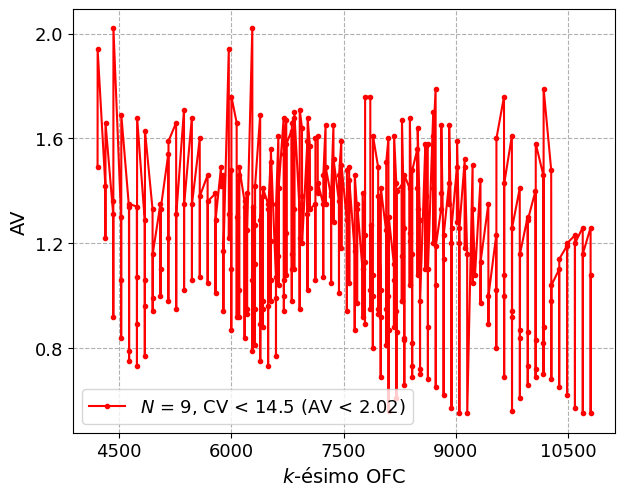

In [ ]:
# Filtrar pontos onde 'E' é menor que CV e plotá-los
low_e_points = subset[subset['E'] <= CV]
print('Numero de dados low_e_points',len(low_e_points))
AV = low_e_points ['F']

# Calcular o valor mínimo de cada coluna
min_va = AV.min()
max_va = AV.max()
print('AV max =', max_va)
print('AV min =', min_va)


plt.rcParams.update({'font.size': h_let})
fig, ax = plt.subplots(figsize=(7,5.5))
fnt_lab = 14 ; fnt_tik_leg = 13
# Plotando os dados
ax.plot(AV,'r.-', label=f'$N$ = {N_used}, CV < {CV} (AV < {max_va})')
# Configurando os limites dos eixos
#ax.set_xlim(-10, 165400)  # Limites para o eixo x
#ax.set_ylim(0, 2.1) # Limites para o eixo y --------------------------------------------
ax.set_xlabel('$k$-ésimo OFC', fontsize=fnt_lab)
ax.set_ylabel("AV", fontsize=fnt_lab)
ax.tick_params(axis='both', labelsize=fnt_tik_leg)
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))  # Ajusta para ter no máximo 5 ticks no eixo X
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Ajusta para ter no máximo 5 ticks no eixo Y
ax.legend(loc='lower left', fontsize=fnt_tik_leg) # Exibindo a legenda
ax.grid(True, linestyle='--')
plt.show() # Mostrando o gráfico

In [ ]:
# ENCONTRAR EQUIVALENCIA CV A AV N = 9

df = dfN15

# Variável M com valores de 1 a 20 em incrementos de 0.5
M = np.arange(3, 17, 0.1)

# Listas para armazenar os resultados
m_values = []
e_values = []
f_values = []

# Iterar sobre os valores de M
for m_value in M:
    # Filtrar o DataFrame para obter linhas onde E é menor que o valor atual de M
    filtered_df = df[df['E'] <= m_value]

    if not filtered_df.empty:
        # Encontrar o máximo valor de F no DataFrame filtrado
        max_f_value = filtered_df['F'].max()

        # Encontrar o valor correspondente de E para o máximo valor de F
        corresponding_e_value = filtered_df.loc[filtered_df['F'] == max_f_value, 'E'].values[0]

        # Adicionar os valores às listas
        m_values.append(m_value)
        e_values.append(round(corresponding_e_value,2))
        f_values.append(max_f_value)
    else:
        # Caso o DataFrame filtrado esteja vazio
        m_values.append(m_value)
        e_values.append(None)
        f_values.append(None)

# Criar um novo DataFrame com os resultados
results_df = pd.DataFrame({
    'M': m_values,
    'E': e_values,
    'F': f_values
})

# Remover as linhas repetidas, mantendo apenas a última ocorrência
df_unique = results_df.drop_duplicates(subset=['E', 'F'], keep='last')

print(df_unique)
# Salvar o DataFrame em um arquivo Excel
df_unique.to_excel('outputCV_AV_N_9.xlsx', index=False)

        M      E     F
21    5.1    NaN   NaN
23    5.3   5.18  0.55
25    5.5   5.38  0.55
26    5.6   5.56  0.57
36    6.6   5.68  0.70
38    6.8   6.64  0.73
42    7.2   6.87  0.80
43    7.3   7.29  0.84
44    7.4   7.31  0.87
47    7.7   7.49  0.93
49    7.9   7.77  0.94
50    8.0   7.97  0.95
51    8.1   8.08  1.02
58    8.8   8.18  1.08
60    9.0   8.85  1.14
69    9.9   9.02  1.23
71   10.1   9.94  1.35
78   10.8  10.13  1.36
85   11.5  10.82  1.44
89   11.9  11.55  1.50
91   12.1  11.91  1.61
93   12.3  12.13  1.66
101  13.1  12.34  1.69
104  13.4  13.19  1.76
106  13.6  13.40  1.76
111  14.1  13.68  1.79
113  14.3  14.20  1.94
128  15.8  14.33  2.02
132  16.2  15.84  2.12
133  16.3  16.25  2.19
139  16.9  16.39  2.32


tamanho de amostras do df 10815


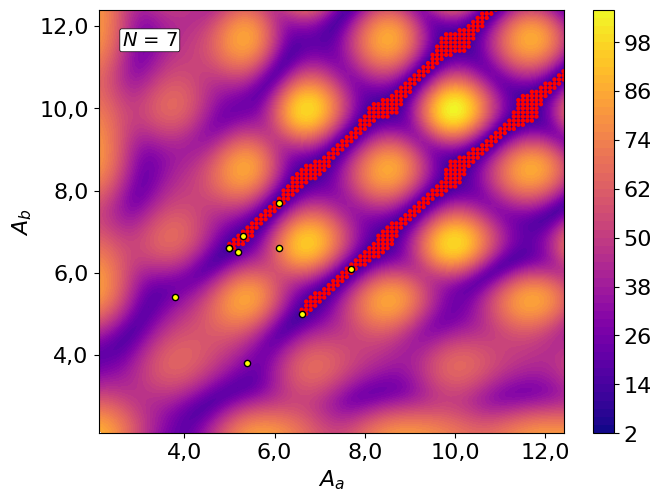

P0   : 5.2 6.5
P1   : 5.3 6.9
P2   : 5.0 6.6
Pb9 : 7.7 6.1
Pb5 : 5.4 3.8
Pb7 : 6.6 5.0
P no EC : 6.1 6.6


Pb7a: 6.6 
Pb7b: 5.0
Pb7a*: 5.0 
Pb7b*: 6.6


In [ ]:
# ANALISE N = 7

# dados gerado para Apm = 1.9, Aa, Ab  = 5.5 a 17 quando N = 15 linhs foram comparadas
url_n15 = 'https://raw.githubusercontent.com/khipucode/phd_data_and_codes/main/dados/Data_4_3_2_values_MZM_N_7_Ax_2.1_12.5.csv'


Apm_value = 0
CV1 = 14 #14.315
N_used1 = 7

#color_cmap ='OrRd'  # cor do mapa
#point_color = 'red'  # cor dos pontos

dfN15 = pd.read_csv(url_n15)
print('tamanho de amostras do df', len(dfN15))


# Configurações de estilo
tk_sz = 16  # Tamanho dos ticks nos eixos
ax_lb_sz = 16  # Tamanho das labels dos eixos
ann_tx_sz = 14  # Tamanho do texto da anotação
an_bg_cl = 'white'  # Cor de fundo da anotação
h_let = 16


# Dando nomenas colunas
dfN15.shape

#              nv,  iApm, iAa, iAb, CV,  AV, flat, CVmin, a1,a2,a3
dfN15.columns = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L']
subset = dfN15[dfN15['B'] == Apm_value]

# Cria uma grade regular de pontos
c_unique = np.linspace(subset['C'].min(), subset['C'].max(), len(subset['C'].unique()))
d_unique = np.linspace(subset['D'].min(), subset['D'].max(), len(subset['D'].unique()))
c_grid, d_grid = np.meshgrid(c_unique, d_unique)

# Interpola os valores de 'E' para a grade criada
e_grid = griddata((subset['C'], subset['D']), subset['E'], (c_grid, d_grid), method='cubic')

# Cria o gráfico de contorno
plt.rcParams.update({'font.size': h_let})
plt.figure(figsize=(7.5, 5.5))
# Definir o formatter para os eixos x e y
formatter = FuncFormatter(format_comma)
plt.gca().xaxis.set_major_formatter(formatter)
plt.gca().yaxis.set_major_formatter(formatter)

contour = plt.contourf(c_grid, d_grid, e_grid, levels=50, cmap=color_cmap) # cmap='viridis')
plt.colorbar(contour)
#plt.title(f'Mapa de Calor para Apm = {Apm_value}')
plt.xlabel('$A_a$')
plt.ylabel('$A_b$')

# Filtrar pontos onde 'E' é menor que CV e plotá-los
low_e_points = subset[subset['E'] < CV1]
#plt.scatter(low_e_points['C'], low_e_points['D'], color='red', label=f'E < {CV}')
#plt.scatter(low_e_points['C'], low_e_points['D'], color='red', s=20, edgecolors='black', label=f'E < {CV}')  # 's' é o tamanho do marcador
plt.scatter(low_e_points['C'], low_e_points['D'], color= point_color , s=10 , edgecolors='none', label=f'E < {CV1}')  # Sem bordas nos marcadores, color='r', marker='.')

plt.annotate(f'$N$ = {N_used1}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=ann_tx_sz,
              backgroundcolor=an_bg_cl, ha='left', va='top',
              bbox=dict(boxstyle="round,pad=0.1", edgecolor='black', linewidth=0.5, facecolor='white'))


Aa1 = 5.2; Ab1 = 6.5
Aa2 = 5.3; Ab2 = 6.9
Aa3 = 5.0; Ab3 = 6.6
Pb9a = 7.7
Pb9b = 6.1
Pb7a = 6.6
Pb7b = 5.0
Pb5a = 5.4
Pb5b = 3.8
noEa = 6.1
noEb = 6.6
#tamanho da bolita
sbol = 20
plt.scatter(Pb9a, Pb9b, color='yellow', s=sbol, edgecolors='black', zorder=5, label= 'p')  # 's' é o tamanho do marcador
plt.scatter(Pb9b, Pb9a, color='yellow', s=sbol, edgecolors='black', zorder=5, label= 'p')  # 's' é o tamanho do marcador
plt.scatter(Pb5a, Pb5b, color='yellow', s=sbol, edgecolors='black', zorder=5, label= 'p')  # 's' é o tamanho do marcador
plt.scatter(Pb5b, Pb5a, color='yellow', s=sbol, edgecolors='black', zorder=5, label= 'p')  # 's' é o tamanho do marcador
plt.scatter(Pb7a, Pb7b, color='yellow', s=sbol, edgecolors='black', zorder=5, label= 'p')  # 's' é o tamanho do marcador
plt.scatter(Pb7b, Pb7a, color='yellow', s=sbol, edgecolors='black', zorder=5, label= 'p')  # 's' é o tamanho do marcador
plt.scatter(noEa, noEb, color='yellow', s=sbol, edgecolors='black', zorder=5)  # 's' é o tamanho do marcador

plt.scatter(Aa1, Ab1, color='yellow', s=sbol, edgecolors='black', zorder=5)  # 's' é o tamanho do marcador
plt.scatter(Aa2, Ab2, color='yellow', s=sbol, edgecolors='black', zorder=5)  # 's' é o tamanho do marcador
plt.scatter(Aa3, Ab3, color='yellow', s=sbol, edgecolors='black', zorder=5)  # 's' é o tamanho do marcador
#plt.scatter(Aa4, Ab4, color='white', s=25, edgecolors='black', zorder=5)  # 's' é o tamanho do marcador

# Acessar o objeto de eixos atual
ax = plt.gca()
# Configurar o número de ticks
ax.xaxis.set_major_locator(MaxNLocator(6))  # Definir 5 ticks no eixo X
ax.yaxis.set_major_locator(MaxNLocator(6))  # Definir 6 ticks no eixo Y
# Adicionando legenda
#plt.legend()
plt.show()

print('P0   :', Aa1, Ab1)
print('P1   :', Aa2, Ab2)
print('P2   :', Aa3, Ab3)
print('Pb9 :', Pb9a, Pb9b)
print('Pb5 :', Pb5a, Pb5b)
print('Pb7 :', Pb7a, Pb7b)
print('P no EC :', noEa, noEb)
print('\n')

# DataFrame para encontrar as minimas potencias PbN
df = low_e_points
# Calculando o índice do ponto em 'D' mais próximo de 0
idx1 = (df['D'] - 0).abs().idxmin()
idx2 = (df['C'] - 0).abs().idxmin()
# Extraindo os valores de 'C' e 'D' para esse índice
PbN_a = df.loc[idx1, 'C']
PbN_b = df.loc[idx1, 'D']

PbN_a_ = df.loc[idx2, 'C']
PbN_b_ = df.loc[idx2, 'D']

print(f"Pb{N_used1}a: {PbN_a} \nPb{N_used1}b: {PbN_b}")
print(f"Pb{N_used1}a*: {PbN_a_} \nPb{N_used1}b*: {PbN_b_}")

In [ ]:
# Valores específicos para B e C que você deseja usar para encontrar o valor correspondente em D
Aa = 3.2  # Substitua por seu valor específico
Ab = 4.8  # Substitua por seu valor específico
# Filtrar o DataFrame para as linhas onde B e C têm os valores especificados
CVfx = dfN15[(dfN15['C'] == Aa) & (dfN15['D'] == Ab)]['E'].iloc[0]
print("CV fix:", round(CVfx,2))

AVfx = dfN15[(dfN15['C'] == Aa) & (dfN15['D'] == Ab)]['F'].iloc[0]
print("AV fix:", round(AVfx,2))

CV fix: 23.79
AV fix: 2.41


Numero de dados low_e_points 484
AV max = 1.93
AV min = 0.39


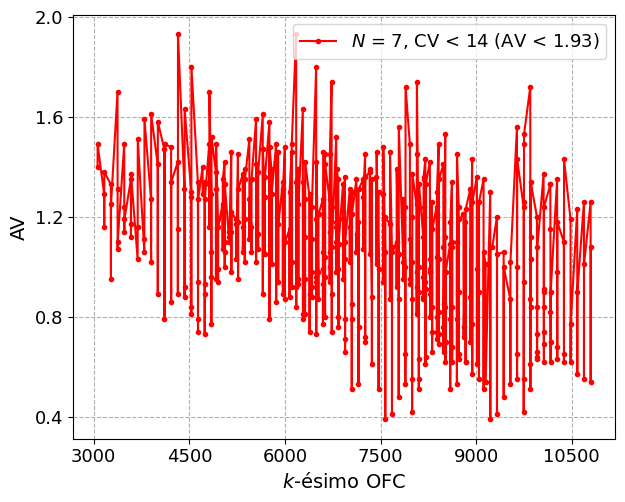

In [ ]:
# Filtrar pontos onde 'E' é menor que CV e plotá-los
low_e_points = subset[subset['E'] <= CV1]
print('Numero de dados low_e_points',len(low_e_points))
AV = low_e_points ['F']

# Calcular o valor mínimo de cada coluna
min_va = AV.min()
max_va = AV.max()
print('AV max =', max_va)
print('AV min =', min_va)


plt.rcParams.update({'font.size': h_let})
fig, ax = plt.subplots(figsize=(7,5.5))
fnt_lab = 14 ; fnt_tik_leg = 13
# Plotando os dados
ax.plot(AV,'r.-', label=f'$N$ = {N_used1}, CV < {CV1} (AV < {max_va})')
# Configurando os limites dos eixos
#ax.set_xlim(-10, 165400)  # Limites para o eixo x
#ax.set_ylim(0, 2.1) # Limites para o eixo y --------------------------------------------
ax.set_xlabel('$k$-ésimo OFC', fontsize=fnt_lab)
ax.set_ylabel("AV", fontsize=fnt_lab)
ax.tick_params(axis='both', labelsize=fnt_tik_leg)
ax.xaxis.set_major_locator(MaxNLocator(nbins=6))  # Ajusta para ter no máximo 5 ticks no eixo X
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))  # Ajusta para ter no máximo 5 ticks no eixo Y
ax.legend(loc='upper right', fontsize=fnt_tik_leg) # Exibindo a legenda
ax.grid(True, linestyle='--')
plt.show() # Mostrando o gráfico

In [ ]:
# ENCONTRAR EQUIVALENCIA CV A AV N = 9

df = dfN15

# Variável M com valores de 1 a 20 em incrementos de 0.5
M = np.arange(3, 17, 0.1)

# Listas para armazenar os resultados
m_values = []
e_values = []
f_values = []

# Iterar sobre os valores de M
for m_value in M:
    # Filtrar o DataFrame para obter linhas onde E é menor que o valor atual de M
    filtered_df = df[df['E'] <= m_value]

    if not filtered_df.empty:
        # Encontrar o máximo valor de F no DataFrame filtrado
        max_f_value = filtered_df['F'].max()

        # Encontrar o valor correspondente de E para o máximo valor de F
        corresponding_e_value = filtered_df.loc[filtered_df['F'] == max_f_value, 'E'].values[0]

        # Adicionar os valores às listas
        m_values.append(m_value)
        e_values.append(round(corresponding_e_value,2))
        f_values.append(max_f_value)
    else:
        # Caso o DataFrame filtrado esteja vazio
        m_values.append(m_value)
        e_values.append(None)
        f_values.append(None)

# Criar um novo DataFrame com os resultados
results_df = pd.DataFrame({
    'M': m_values,
    'E': e_values,
    'F': f_values
})

# Remover as linhas repetidas, mantendo apenas a última ocorrência
df_unique = results_df.drop_duplicates(subset=['E', 'F'], keep='last')

print(df_unique)
# Salvar o DataFrame em um arquivo Excel
df_unique.to_excel('outputCV_AV_N_7.xlsx', index=False)

        M      E     F
9     3.9    NaN   NaN
10    4.0   3.97  0.39
11    4.1   4.02  0.41
16    4.6   4.19  0.51
20    5.0   4.62  0.61
21    5.1   5.10  0.66
27    5.7   5.18  0.70
31    6.1   5.79  0.76
33    6.3   6.18  0.80
45    7.5   6.36  0.87
46    7.6   7.59  0.88
47    7.7   7.61  0.89
48    7.8   7.77  0.99
59    8.9   7.87  1.06
60    9.0   8.92  1.15
62    9.2   9.09  1.17
68    9.8   9.22  1.24
69    9.9   9.89  1.24
78   10.8   9.95  1.34
86   11.6  10.88  1.49
88   11.8  11.61  1.58
99   12.9  11.90  1.63
106  13.6  12.90  1.72
108  13.8  13.69  1.74
125  15.5  13.80  1.93
135  16.5  15.56  2.15
139  16.9  16.50  2.28
